In [ ]:
from google.colab import drive
import zipfile
import os
from tensorflow.keras.applications import MobileNetV2, VGG16, DenseNet121

drive.mount('/content/drive')
with zipfile.ZipFile('/content/drive/MyDrive/Dataset_Bersih.zip', 'r') as zip_ref:
    zip_ref.extractall('/content/')

Mounted at /content/drive


In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.preprocessing import image_dataset_from_directory


# Path ke direktori dataset
dataset_dir = '/content/Dataset Bersih'

# Memuat dataset dengan shuffle diatur ke True
full_dataset = image_dataset_from_directory(dataset_dir,
                                            labels='inferred',
                                            label_mode='int',
                                            image_size=(224, 224),
                                            class_names=['mel', 'bcc', 'norm'],
                                            batch_size=32,
                                            shuffle=True)

# Memuat MobileNetV2 pre-trained model
mobilenet_model = tf.keras.applications.MobileNetV2(input_shape=(224, 224, 3),
                                                     include_top=False,
                                                     weights='imagenet')
mobilenet_model.trainable = True

# Memuat vgg50V2 pre-trained model
vgg_model = tf.keras.applications.VGG16(input_shape=(224, 224, 3),
                                                 include_top=False,
                                                 weights='imagenet')
vgg_model.trainable = True

# Membuat generator fitur dari dataset menggunakan MobileNetV2
mobilenet_feature_extractor = tf.keras.Sequential([
    mobilenet_model,
    tf.keras.layers.GlobalAveragePooling2D()
])

# Membuat generator fitur dari dataset menggunakan vgg50V2
vgg_feature_extractor = tf.keras.Sequential([
    vgg_model,
    tf.keras.layers.GlobalAveragePooling2D()
])

# Inisialisasi list untuk menyimpan fitur dan label
mobilenet_features_list = []
vgg_features_list = []
labels_list = []

# Ekstrak fitur dari dataset menggunakan MobileNetV2 dan vgg50V2
for images, labels in full_dataset:
    # Ekstraksi fitur menggunakan MobileNetV2
    mobilenet_features = mobilenet_feature_extractor(images)
    mobilenet_features_list.append(mobilenet_features.numpy())

    # Ekstraksi fitur menggunakan vgg50V2
    vgg_features = vgg_feature_extractor(images)
    vgg_features_list.append(vgg_features.numpy())

    labels_list.append(labels.numpy())

# Menggabungkan fitur dan label menjadi numpy arrays
mobilenet_features_array = np.concatenate(mobilenet_features_list)
vgg_features_array = np.concatenate(vgg_features_list)
labels_array = np.concatenate(labels_list)

# Membuat DataFrame dari fitur dan label untuk MobileNetV2
mobilenet_feature_columns = [f"mobilenet_feature_{i+1}" for i in range(mobilenet_features_array.shape[1])]
mobilenet_df = pd.DataFrame(mobilenet_features_array, columns=mobilenet_feature_columns)
mobilenet_df['label'] = labels_array

# Membuat DataFrame dari fitur dan label untuk vgg50V2
vgg_feature_columns = [f"vgg_feature_{i+1}" for i in range(vgg_features_array.shape[1])]
vgg_df = pd.DataFrame(vgg_features_array, columns=vgg_feature_columns)
vgg_df['label'] = labels_array

# Tampilkan DataFrame untuk MobileNetV2
print("DataFrame untuk MobileNetV2:")
print(mobilenet_df)




Found 1725 files belonging to 3 classes.
58889256/58889256 [==============================] - 4s 0us/step
DataFrame untuk MobileNetV2:
      mobilenet_feature_1  mobilenet_feature_2  mobilenet_feature_3  \
0                0.000000             1.678070             0.000000   
1                0.000000             0.000000             0.003368   
2                0.000000             0.017255             0.001122   
3                0.000000             1.312659             0.000000   
4                0.000000             0.133993             0.000000   
...                   ...                  ...                  ...   
1720             0.303896             0.860067             0.000000   
1721             0.087119             0.605298             0.000000   
1722             0.137545             0.826954             0.000000   
1723             0.000000             0.038828             0.000000   
1724             0.057941             0.640476             0.000000   

      mobile

In [ ]:
# Tampilkan DataFrame untuk vgg50V2
print("\nDataFrame untuk vgg50V2:")
print(vgg_df)


DataFrame untuk vgg50V2:
      vgg_feature_1  vgg_feature_2  vgg_feature_3  vgg_feature_4  \
0          4.848273            0.0       2.828961       0.346269   
1          0.217502            0.0       0.000000       0.000000   
2          0.095728            0.0       1.510245       0.309604   
3          0.000000            0.0       0.000000       0.000000   
4          0.000000            0.0       0.000000       0.000000   
...             ...            ...            ...            ...   
1720       0.000000            0.0       2.516119       0.137331   
1721       0.000000            0.0       0.552792       0.000000   
1722       0.375365            0.0       0.000000       0.000000   
1723       0.000000            0.0       0.000000       0.000000   
1724       1.056515            0.0       0.000000       0.000000   

      vgg_feature_5  vgg_feature_6  vgg_feature_7  vgg_feature_8  \
0          0.965285         0.0000       5.666401       0.533953   
1          0.000000  

In [ ]:
# Menggabungkan fitur dan label menjadi numpy arrays
mobilenet_features_array = np.concatenate(mobilenet_features_list)
vgg_features_array = np.concatenate(vgg_features_list)
labels_array = np.concatenate(labels_list)

# Gabungkan fitur dari MobileNetV2 dan vgg50V2
combined_features_array = np.concatenate([mobilenet_features_array, vgg_features_array], axis=1)

# Membuat DataFrame dari fitur gabungan dan label
combined_feature_columns = [f"feature_{i+1}" for i in range(combined_features_array.shape[1])]
combined_df = pd.DataFrame(combined_features_array, columns=combined_feature_columns)
combined_df['label'] = labels_array

# Function to map label integer to class name
def map_label(label):
    class_names = ['mel', 'bcc', 'norm']
    return class_names[label]

# Applying map_label function to convert labels to class names
combined_df['label'] = combined_df['label'].apply(map_label)

# Displaying DataFrame with better format
pd.set_option('display.max_columns', 10)  # Show all columns
pd.set_option('display.max_rows', 10)  # Limit the number of rows displayed
pd.set_option('display.float_format', lambda x: '%.4f' % x)  # Format float numbers

# Tampilkan DataFrame gabungan
print("DataFrame gabungan untuk MobileNetV2 dan vgg50V2:")

# Showing the first few rows of the DataFrame
print(combined_df.head())


DataFrame gabungan untuk MobileNetV2 dan vgg50V2:
   feature_1  feature_2  feature_3  feature_4  feature_5  ...  feature_1789  \
0     0.0000     1.6781     0.0000     0.4595     0.4521  ...        0.1507   
1     0.0000     0.0000     0.0034     0.1289     0.0019  ...        0.0000   
2     0.0000     0.0173     0.0011     0.0834     0.0000  ...        0.0000   
3     0.0000     1.3127     0.0000     0.1098     0.3152  ...        0.0000   
4     0.0000     0.1340     0.0000     0.0000     0.0000  ...        0.0000   

   feature_1790  feature_1791  feature_1792  label  
0        0.0000        4.5935        0.0000    bcc  
1        0.0000        7.7700        0.0000   norm  
2        0.0117        5.7373        0.1542    mel  
3        0.0000        0.8897        0.0000    bcc  
4        0.0000        0.8965        0.0000    bcc  

[5 rows x 1793 columns]


In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, classification_report
import joblib  # untuk menyimpan model
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
from sklearn.model_selection import StratifiedKFold

# # Split data menjadi train dan test sets dengan rasio 80/20
# X = combined_df.drop(columns=['label']).values
# y = combined_df['label'].values

# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# # Inisialisasi SVM
# svm_model = SVC(kernel='linear', probability=True)

# # KFold Cross Validation dengan k=5
# kf = KFold(n_splits=5, shuffle=True, random_state=42)

# # List untuk menyimpan akurasi tiap fold
# fold_accuracies = []

# # Loop untuk cross-validation
# for train_index, val_index in kf.split(X_train):
#     X_train_fold, X_val_fold = X_train[train_index], X_train[val_index]
#     y_train_fold, y_val_fold = y_train[train_index], y_train[val_index]

#     # Train SVM model
#     svm_model.fit(X_train_fold, y_train_fold)

#     # Evaluate SVM model
#     accuracy = svm_model.score(X_val_fold, y_val_fold)
#     fold_accuracies.append(accuracy)
#     print(f"Fold accuracy: {accuracy}")

# # Tampilkan akurasi tiap fold dan akurasi terbaik
# best_accuracy = max(fold_accuracies)
# print(f"Best accuracy: {best_accuracy}")

# # Train model on full training data
# svm_model.fit(X_train, y_train)

# # Predict on test data
# y_pred = svm_model.predict(X_test)

# # Tampilkan confusion matrix dan classification report
# conf_matrix = confusion_matrix(y_test, y_pred)
# class_report = classification_report(y_test, y_pred)

# print("Confusion Matrix:")
# print(conf_matrix)

# print("\nClassification Report:")
# print(class_report)

# # Simpan model ke disk
# joblib.dump(svm_model, 'svm_model.pkl')

k = 5  # Number of folds
skf = StratifiedKFold(n_splits=k, shuffle=True, random_state=42)
accuracies = []
precisions = []
sensitivities = []
specificities = []
f1_scores = []
best_accuracy = 0
best_model = None
best_confusion_matrix = None
best_classification_report = None

for fold, (train_index, test_index) in enumerate(skf.split(combined_features_array, labels_array)):
    train_features, test_features = combined_features_array[train_index], combined_features_array[test_index]
    train_labels, test_labels = labels_array[train_index], labels_array[test_index]

    svm = SVC()
    svm.fit(train_features, train_labels)

    predictions = svm.predict(test_features)
    accuracy = accuracy_score(test_labels, predictions)
    accuracies.append(accuracy)

    precision = precision_score(test_labels, predictions, average='weighted')
    precisions.append(precision)

    recall = recall_score(test_labels, predictions, average='weighted')
    sensitivities.append(recall)

    cm = confusion_matrix(test_labels, predictions)
    specificity = np.diag(cm) / np.sum(cm, axis=1)
    specificity = np.mean(specificity)
    specificities.append(specificity)

    f1 = f1_score(test_labels, predictions, average='weighted')
    f1_scores.append(f1)

    print(f'Fold {fold + 1}, Accuracy: {accuracy:.4f}, Precision: {precision:.4f}, Sensitivity: {recall:.4f}, Specificity: {specificity:.4f}, F1-score: {f1:.4f}')

    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_model = svm
        best_confusion_matrix = cm
        best_classification_report = classification_report(test_labels, predictions)
        joblib.dump(best_model, 'best_svm_model.pkl')

average_accuracy = np.mean(accuracies)
average_precision = np.mean(precisions)
average_sensitivity = np.mean(sensitivities)
average_specificity = np.mean(specificities)
average_f1 = np.mean(f1_scores)

print(f'Average accuracy: {average_accuracy:.4f}, Best accuracy: {best_accuracy:.4f}')
print("Best Confusion Matrix:")
print(best_confusion_matrix)
print("Best Classification Report:")
print(best_classification_report)

print(f'Average Precision: {average_precision:.4f}')
print(f'Average Sensitivity: {average_sensitivity:.4f}')
print(f'Average Specificity: {average_specificity:.4f}')
print(f'Average F1-score: {average_f1:.4f}')

Fold 1, Accuracy: 0.8551, Precision: 0.8574, Sensitivity: 0.8551, Specificity: 0.8551, F1-score: 0.8558
Fold 2, Accuracy: 0.8435, Precision: 0.8456, Sensitivity: 0.8435, Specificity: 0.8435, F1-score: 0.8437
Fold 3, Accuracy: 0.8464, Precision: 0.8500, Sensitivity: 0.8464, Specificity: 0.8464, F1-score: 0.8464
Fold 4, Accuracy: 0.8696, Precision: 0.8717, Sensitivity: 0.8696, Specificity: 0.8696, F1-score: 0.8702
Fold 5, Accuracy: 0.8435, Precision: 0.8458, Sensitivity: 0.8435, Specificity: 0.8435, F1-score: 0.8440
Average accuracy: 0.8516, Best accuracy: 0.8696
Best Confusion Matrix:
[[ 98  14   3]
 [ 11 100   4]
 [  5   8 102]]
Best Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.85      0.86       115
           1       0.82      0.87      0.84       115
           2       0.94      0.89      0.91       115

    accuracy                           0.87       345
   macro avg       0.87      0.87      0.87       345
weighted 

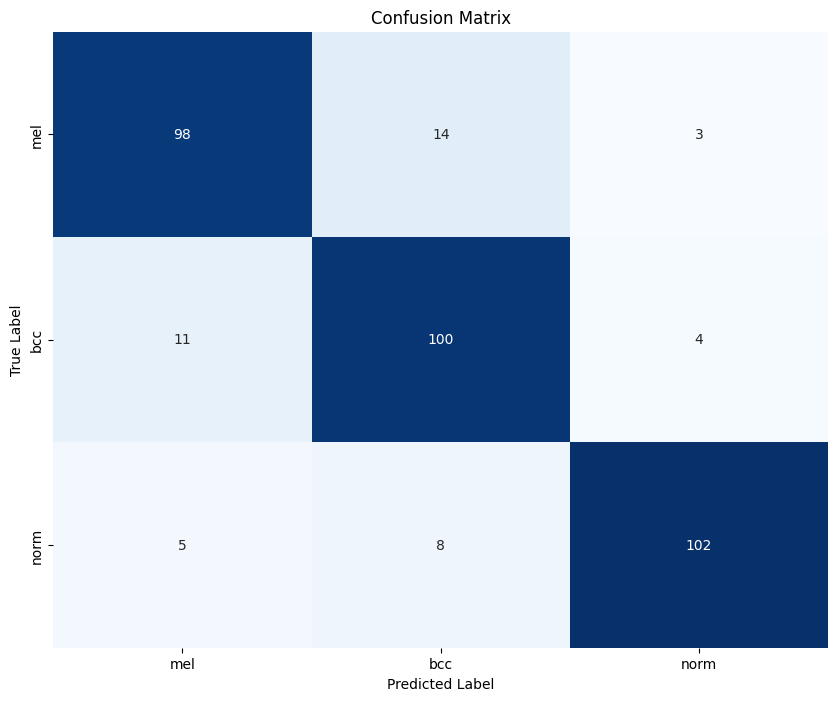

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plotting Confusion Matrix
# plt.figure(figsize=(10, 8))
# sns.heatmap(best_confusion_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
# plt.title('Confusion Matrix')
# plt.xlabel('Predicted Label')
# plt.ylabel('True Label')
# plt.show()

# Menampilkan Confusion Matrix dengan label yang tepat
plt.figure(figsize=(10, 8))
sns.heatmap(best_confusion_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)

# Mendapatkan nama kelas dari variabel class_names
class_names = ['mel', 'bcc', 'norm']

# Menambahkan label ke sumbu x dan y
plt.xticks(ticks=np.arange(len(class_names))+0.5, labels=class_names, ha='center')
plt.yticks(ticks=np.arange(len(class_names))+0.5, labels=class_names, va='center')

plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()



In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import joblib

# Memuat model SVM terbaik yang sudah disimpan sebelumnya
best_svm = joblib.load('best_svm_model.pkl')

# Parameter yang akan diuji
param_grid = {
    'C': [0.1, 1, 10, 100],
    'gamma': ['scale', 'auto', 0.1, 1, 10],
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid']
}

# Membuat objek GridSearchCV
grid_search = GridSearchCV(estimator=best_svm, param_grid=param_grid, cv=5, scoring='accuracy')

# Melakukan grid search
grid_search.fit(train_features, train_labels)

# Menampilkan parameter terbaik
print("Parameter terbaik:", grid_search.best_params_)


Parameter terbaik: {'C': 10, 'gamma': 'scale', 'kernel': 'rbf'}


In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, KFold, GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
import joblib

# Best parameters obtained from GridSearchCV
best_params = {'C': 10, 'gamma': 'scale', 'kernel': 'rbf'}

k = 5  # Number of folds
skf = StratifiedKFold(n_splits=k, shuffle=True, random_state=42)
accuracies = []
precisions = []
sensitivities = []
specificities = []
f1_scores = []
best_accuracy = 0
best_model = None
best_confusion_matrix = None
best_classification_report = None

for fold, (train_index, test_index) in enumerate(skf.split(combined_features_array, labels_array)):
    train_features, test_features = combined_features_array[train_index], combined_features_array[test_index]
    train_labels, test_labels = labels_array[train_index], labels_array[test_index]

    svm = SVC(**best_params)
    svm.fit(train_features, train_labels)

    predictions = svm.predict(test_features)
    accuracy = accuracy_score(test_labels, predictions)
    accuracies.append(accuracy)

    precision = precision_score(test_labels, predictions, average='weighted')
    precisions.append(precision)

    recall = recall_score(test_labels, predictions, average='weighted')
    sensitivities.append(recall)

    cm = confusion_matrix(test_labels, predictions)
    specificity = np.diag(cm) / np.sum(cm, axis=1)
    specificity = np.mean(specificity)
    specificities.append(specificity)

    f1 = f1_score(test_labels, predictions, average='weighted')
    f1_scores.append(f1)

    print(f'Fold {fold + 1}, Accuracy: {accuracy:.4f}, Precision: {precision:.4f}, Sensitivity: {recall:.4f}, Specificity: {specificity:.4f}, F1-score: {f1:.4f}')

    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_model = svm
        best_confusion_matrix = cm
        best_classification_report = classification_report(test_labels, predictions)
        joblib.dump(best_model, 'best_svm_model.pkl')

average_accuracy = np.mean(accuracies)
average_precision = np.mean(precisions)
average_sensitivity = np.mean(sensitivities)
average_specificity = np.mean(specificities)
average_f1 = np.mean(f1_scores)

print(f'Average accuracy: {average_accuracy:.4f}, Best accuracy: {best_accuracy:.4f}')
print("Best Confusion Matrix:")
print(best_confusion_matrix)
print("Best Classification Report:")
print(best_classification_report)

print(f'Average Precision: {average_precision:.4f}')
print(f'Average Sensitivity: {average_sensitivity:.4f}')
print(f'Average Specificity: {average_specificity:.4f}')
print(f'Average F1-score: {average_f1:.4f}')

Fold 1, Accuracy: 0.8493, Precision: 0.8509, Sensitivity: 0.8493, Specificity: 0.8493, F1-score: 0.8499
Fold 2, Accuracy: 0.8870, Precision: 0.8880, Sensitivity: 0.8870, Specificity: 0.8870, F1-score: 0.8873
Fold 3, Accuracy: 0.8841, Precision: 0.8860, Sensitivity: 0.8841, Specificity: 0.8841, F1-score: 0.8840
Fold 4, Accuracy: 0.8870, Precision: 0.8868, Sensitivity: 0.8870, Specificity: 0.8870, F1-score: 0.8868
Fold 5, Accuracy: 0.8725, Precision: 0.8765, Sensitivity: 0.8725, Specificity: 0.8725, F1-score: 0.8734
Average accuracy: 0.8759, Best accuracy: 0.8870
Best Confusion Matrix:
[[100  10   5]
 [ 13 101   1]
 [  4   6 105]]
Best Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.87      0.86       115
           1       0.86      0.88      0.87       115
           2       0.95      0.91      0.93       115

    accuracy                           0.89       345
   macro avg       0.89      0.89      0.89       345
weighted 

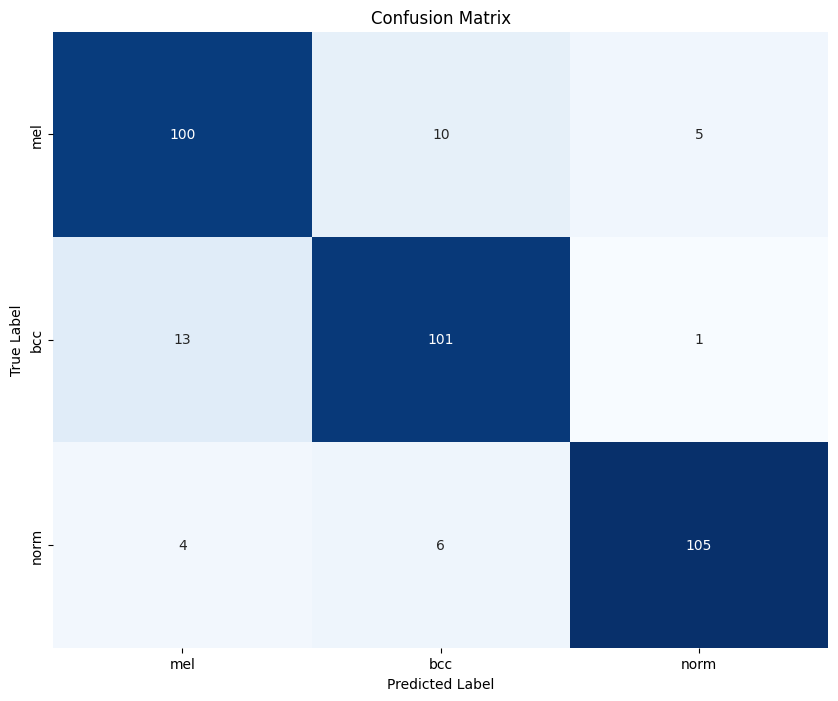

In [ ]:
# Menampilkan Confusion Matrix dengan label yang tepat
plt.figure(figsize=(10, 8))
sns.heatmap(best_confusion_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)

# Mendapatkan nama kelas dari variabel class_names
class_names = ['mel', 'bcc', 'norm']

# Menambahkan label ke sumbu x dan y
plt.xticks(ticks=np.arange(len(class_names))+0.5, labels=class_names, ha='center')
plt.yticks(ticks=np.arange(len(class_names))+0.5, labels=class_names, va='center')

plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()